In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [ ]:
### Linear Regression

In [2]:
data = pd.read_csv("advertising.csv")
data.sample(10)

,TV,Radio,Newspaper,Sales
41,177.0,33.4,38.7,17.1
198,283.6,42.0,66.2,25.5
70,199.1,30.6,38.7,18.3
74,213.4,24.6,13.1,17.0
50,199.8,3.1,34.6,16.4
146,240.1,7.3,8.7,18.2
72,26.8,33.0,19.3,8.8
68,237.4,27.5,11.0,18.9
179,165.6,10.0,17.6,17.6
169,284.3,10.6,6.4,20.0


In [3]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [4]:
X, y = data[['TV', 'Radio', 'Newspaper']], data['Sales']
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [5]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [6]:
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
y_norm = scaler.fit_transform(y.values.reshape(-1, 1))

In [7]:
X_norm[:5], y_norm[:5]

(array([[0.77578627, 0.76209677, 0.60598065],
        [0.1481231 , 0.79233871, 0.39401935],
        [0.0557998 , 0.92540323, 0.60686016],
        [0.50997633, 0.83266129, 0.51187335],
        [0.60906324, 0.21774194, 0.51099384]]),
 array([[0.80708661],
        [0.34645669],
        [0.40944882],
        [0.58661417],
        [0.64173228]]))

In [8]:
train_split = int(0.85 * len(data))
X_train, X_val = X_norm[:train_split], X_norm[train_split:]
y_train, y_val = y_norm[:train_split], y_norm[train_split:]

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((170, 3), (30, 3), (170, 1), (30, 1))

In [9]:
LinearRegressionV1 = LinearRegression().fit(X_train, y_train)

In [10]:
LinearRegressionV1.score(X_train, y_train)

0.9003829550614623

In [11]:
y_perd = LinearRegressionV1.predict(X_val)
y_perd

array([[0.27135673],
       [0.55888557],
       [0.2409764 ],
       [0.50745078],
       [0.60851327],
       [0.91680504],
       [0.77621641],
       [0.51592903],
       [0.72178291],
       [0.51380416],
       [0.4630199 ],
       [0.60948365],
       [0.26111129],
       [0.91767424],
       [0.75168655],
       [0.74440807],
       [0.42547855],
       [0.64634435],
       [0.78840946],
       [0.20635052],
       [0.37009039],
       [0.32205839],
       [0.17056785],
       [0.64801364],
       [0.58480462],
       [0.21282065],
       [0.33805633],
       [0.53462288],
       [0.90448294],
       [0.65064665]])

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_val, y_perd)
r2 = r2_score(y_val, y_perd)

mse, r2

(0.004435455043519201, 0.9100791189160852)

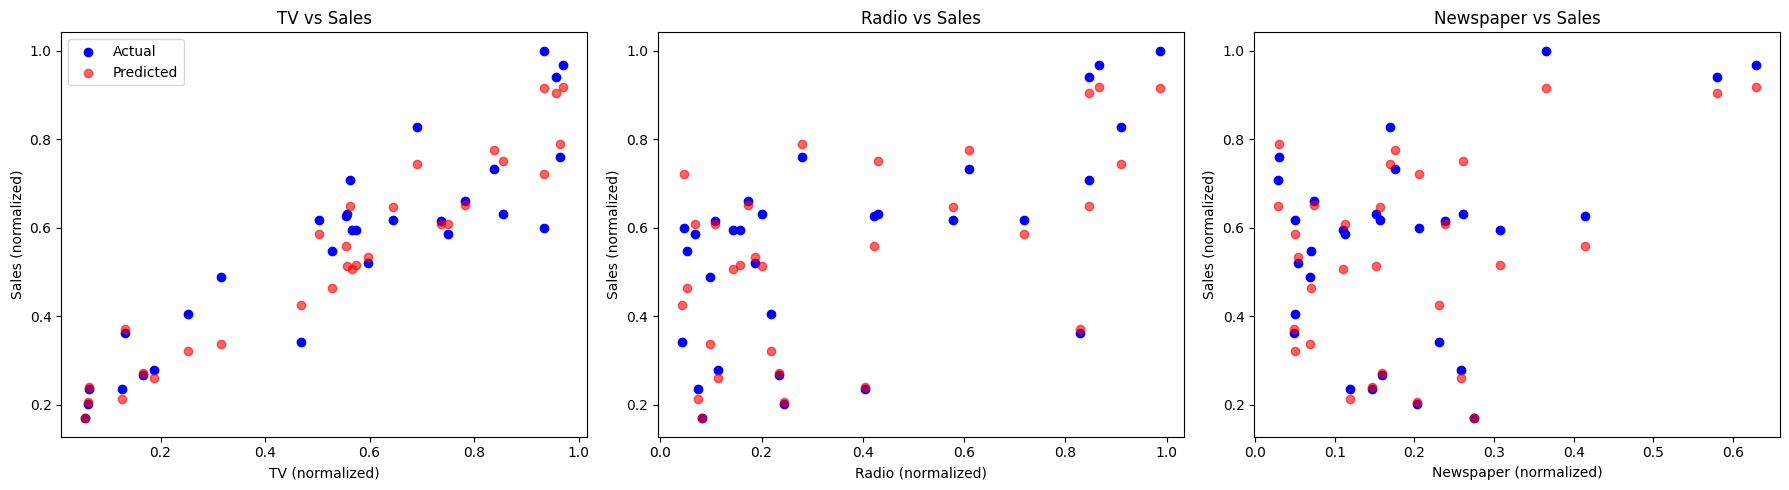

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

feature_names = ['TV', 'Radio', 'Newspaper']
for i, ax in enumerate(axs):
    ax.scatter(X_val[:, i], y_val, color='blue', label='Actual')
    ax.scatter(X_val[:, i], y_perd, color='red', label='Predicted', alpha=0.6)
    ax.set_xlabel(f'{feature_names[i]} (normalized)')
    ax.set_ylabel('Sales (normalized)')
    ax.set_title(f'{feature_names[i]} vs Sales')
    if i == 0:
        ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
### Logistic Regression

In [14]:
data = pd.read_csv("Social_Network_Ads.csv")
data.sample(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
304,15598070,Female,40,60000,0
184,15759066,Female,33,60000,0
88,15768816,Male,26,81000,0
152,15699247,Male,31,76000,0
49,15793813,Female,31,89000,0
260,15811177,Female,35,77000,0
181,15774727,Female,31,71000,0
38,15671766,Female,26,72000,0
99,15756820,Female,28,37000,0
196,15738448,Female,30,79000,0


In [15]:
data["Gender"] = np.where(data["Gender"] == "Female", 0, 1)
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [16]:
X, y = data[["Gender", "Age", "EstimatedSalary"]], data["Purchased"]

train_split = int(0.85 * len(data))
X_train, X_val = X[:train_split], X[train_split:]
y_train, y_val = y[:train_split], y[train_split:]

In [17]:
from sklearn.linear_model import LogisticRegression
LogisticRegressionV1 = LogisticRegression().fit(X_train, y_train)
LogisticRegressionV1.score(X_train, y_train)

/home/rthvk03/miniconda3/envs/common_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8352941176470589

In [18]:
LogisticRegressionV1.predict(X_val)

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [19]:
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix
y_pred = LogisticRegressionV1.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)
cm = confusion_matrix(y_val, y_pred)
mae, accuracy

(0.36666666666666664, 0.6333333333333333)

In [20]:
cm

array([[13,  6],
       [16, 25]])

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.68      0.54        19
           1       0.81      0.61      0.69        41

    accuracy                           0.63        60
   macro avg       0.63      0.65      0.62        60
weighted avg       0.69      0.63      0.65        60



In [ ]:
### Lasso Regression

In [22]:
data = pd.read_csv("advertising.csv")
data.sample(10)

,TV,Radio,Newspaper,Sales
78,5.4,29.9,9.4,5.3
27,240.1,16.7,22.9,20.9
89,109.8,47.8,51.4,16.7
129,59.6,12.0,43.1,9.7
50,199.8,3.1,34.6,16.4
130,0.7,39.6,8.7,1.6
25,262.9,3.5,19.5,17.0
112,175.7,15.4,2.4,17.1
177,170.2,7.8,35.2,16.7
36,266.9,43.8,5.0,25.4


In [23]:
X, y = data[['TV', 'Radio', 'Newspaper']], data['Sales']

In [24]:
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
y_norm = scaler.fit_transform(y.values.reshape(-1, 1))

In [25]:
X_norm[:5], y_norm[:5]

(array([[0.77578627, 0.76209677, 0.60598065],
        [0.1481231 , 0.79233871, 0.39401935],
        [0.0557998 , 0.92540323, 0.60686016],
        [0.50997633, 0.83266129, 0.51187335],
        [0.60906324, 0.21774194, 0.51099384]]),
 array([[0.80708661],
        [0.34645669],
        [0.40944882],
        [0.58661417],
        [0.64173228]]))

In [26]:
train_split = int(0.85 * len(data))
X_train, X_val = X_norm[:train_split], X_norm[train_split:]
y_train, y_val = y_norm[:train_split], y_norm[train_split:]

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((170, 3), (30, 3), (170, 1), (30, 1))

In [27]:
from sklearn.linear_model import LassoCV
LassoCV = LassoCV(alphas=[0.01, 0.1, 1, 10], cv=5, random_state=0)
LassoCV.fit(X_train, y_train)


/home/rthvk03/miniconda3/envs/common_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:1714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,eps,0.001
,n_alphas,'deprecated'
,alphas,"[0.01, 0.1, ...]"
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [28]:
LassoCV.alpha_

np.float64(0.01)

In [29]:
from sklearn.linear_model import Lasso
LassoV1 = Lasso(alpha=0.01, random_state=42)
LassoV1.fit(X_train, y_train)

,alpha,0.01
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,42
,selection,'cyclic'


In [30]:
LassoV1.score(X_train, y_train)

0.8444741757155642

In [33]:
y_pred = LassoV1.predict(X_val)
y_pred

array([0.33888146, 0.55707519, 0.30155842, 0.53798583, 0.62569814,
       0.80671941, 0.72162626, 0.54245638, 0.718821  , 0.5385256 ,
       0.50884591, 0.62261875, 0.33866586, 0.81439244, 0.71437211,
       0.67353758, 0.47792977, 0.61835967, 0.75691718, 0.28495102,
       0.37589655, 0.38208071, 0.26729182, 0.6007479 , 0.55874738,
       0.30335393, 0.40377797, 0.55719503, 0.80550162, 0.6524718 ])

In [34]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
mse, r2

(0.007454552537285793, 0.848872342147059)